# 1. Text Cleaning

In [1]:
import pandas as pd 
import numpy as np
import os
base_dir = "YOUR_PATH/net2020-main"
os.chdir(base_dir)

import statsmodels
import statsmodels.api as sm
import scipy.stats as stats

import matplotlib.pyplot as plt

# import the csv file with all the comments and post togheter
comDB = pd.read_csv(r"database/com_liwc.csv", sep='\t', engine='python')

# import the csv file with JUST the politicians post
postDB = pd.read_csv(r"database/postDB.csv", engine='python')

In [2]:
# general info ON COMMENT db
print('## Each row in the db is a comment, the information about the post that generate that comment are in the columns')
print('Number of colums in comDB : ', len(comDB.columns))
print('Number of rows in comDB : ', len(comDB.index))
print('')

# general info ON POST ONLY db
print('## Each row is a posts/tweets made by the politicians, this DB do not contain comments')
print('Number of colums in postDB : ', len(postDB.columns))
print('Number of rows in postDB : ', len(postDB.index))

## Each row in the db is a comment, the information about the post that generate that comment are in the columns
Number of colums in comDB :  243
Number of rows in comDB :  78175

## Each row is a posts/tweets made by the politicians, this DB do not contain comments
Number of colums in postDB :  246
Number of rows in postDB :  10103


In [3]:
# create the Data Frame
df = pd.DataFrame(data=comDB)
df_post = pd.DataFrame(data=postDB)

df

# add a new colum with sequence numbers
df['Count']=1
df_post['Count']=1

# print all the DF
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 5)

df.head()

,Origin_file_order,Site,p_id,dateCreated,p_politician,p_gender,p_GRUPPO_PE,p_LISTA,p_PARTITO,p_governo,p_dx_sx,p_CIRCOSCRIZIONE,p_text,p_favoriteCount,p_shareCount,p_replyCount,p_replyEval,p_numComments,p_numFakeTags,p_rating,p_category,p_topic,p_campagna,p_camapagna2,Target1,Target2,p_targe1-2,target1_s-p,target1_pol,c_text,c_level,c_replyToUser,c_replyToText,c_rating,c_rating3,c_ratingCivile,c_ratingPosNeg,c_category,Unnamed: 38,c_topic,isPersonal,c_WC,c_WPS,c_Sixltr,c_Dic,c_pronomi,c_Io,c_Noi,c_Se,c_Tu,c_Altri,c_Negazio,c_Consen,c_Articol,c_Prepos,c_Numero,c_Affett,c_Sen_Pos,c_Emo_Pos,c_Ottimis,c_Emo_Neg,c_Ansia,c_Rabbia,c_Tristez,c_Mec_Cog,c_Causa,c_Intros,c_Discrep,c_Inibiz,c_possib,c_Certez,c_Proc_Sen,c_Vista,c_Udito,c_Sentim,c_Social,c_Comm,c_Rif_gen,c_amici,c_Famigl,c_Umano,c_Tempo,c_Passato,c_Present,c_Futuro,c_Spazio,c_Sopra,c_Sotto,c_Inclusi,c_Esclusi,c_Movimen,c_Occupaz,c_Scuola,c_Lavoro,c_Raggiun,c_Svago,c_Casa,c_Sport,c_TV_it,c_Musica,c_Soldi,c_Metafis,c_religio,c_Morte,c_Fisico,c_Corpo,c_Sesso,c_Mangiare,c_Dormire,c_Cura_cor,c_parolac,c_Non_flu,c_riempiti,c_Voi,c_Lui_lei,c_Loro,c_Condizio,c_Transiti,c_P_pass,c_gerundio,c_Passivo,c_Essere,c_Avere,c_Formale,c_Io_Ver,c_Tu_Verbo,c_Lui_Verb,c_Noi_Verb,c_Voi_Verb,c_Loro_Ver,c_AllPunc,c_Period,c_Comma,c_Colon,c_SemiC,c_Qmark,c_Exclam,c_Dash,c_Quote,c_Apostro,c_Parenth,c_OtherP,p_WC,p_WPS,p_Sixltr,p_Dic,p_pronomi,p_Io,p_Noi,p_Se,p_Tu,p_Altri,p_Negazio,p_Consen,p_Articol,p_Prepos,p_Numero,p_Affett,p_Sen_Pos,p_Emo_Pos,p_Ottimis,p_Emo_Neg,p_Ansia,p_Rabbia,p_Tristez,p_Mec_Cog,p_Causa,Ip_ntros,p_Discrep,Ip_nibiz,p_possib,p_Certez,p_Proc_Sen,p_Vista,p_Udito,p_Sentim,p_Social,p_Comm,p_Rif_gen,p_amici,p_Famigl,p_Umano,p_Tempo,p_Passato,p_Present,p_Futuro,p_Spazio,p_Sopra,p_Sotto,Ip_nclusi,p_Esclusi,p_Movimen,p_Occupaz,p_Scuola,p_Lavoro,p_Raggiun,p_Svago,p_Casa,p_Sport,p_TV_it,p_Musica,p_Soldi,p_Metafis,p_religio,p_Morte,p_Fisico,p_Corpo,p_Sesso,p_Mangiare,p_Dormire,p_Cura_cor,p_parolac,p_Non_flu,p_riempiti,p_Voi,p_Lui_lei,p_Loro,p_Condizio,p_Transiti,p_P_pass,p_gerundio,p_Passivo,p_Essere,p_Avere,p_Formale,p_Io_Ver,p_Tu_Verbo,p_Lui_Verb,p_Noi_Verb,p_Voi_Verb,p_Loro_Ver,p_AllPunc,p_Period,p_Comma,p_Colon,p_SemiC,p_Qmark,p_Exclam,p_Dash,p_Quote,p_Apostro,p_Parenth,p_OtherP,Count
0,30126,FB,96844400700_10157493758850701,2019-04-23T10:33:37Z,MARCELLO GEMMATO,M,PPE,FDI,FDI,opposizione,destra,s,Se i musulmani pensano di portare la guerra sa...,270,80,57,33,1729,0,problematico,Rifugiati Musulmani,religioni europa,Comparativa,Neg-comp,Categoria di persone,NaN,Categoria di persone,gruppo,non politico,C'Ã¨ poco da dire questa Ã¨ gente che la guerr...,1,FRATELLIDITALIA.PUGLIA,Se i musulmani pensano di portare la guerra sa...,problematico,probl-hate,incivile,negativo,Rifugiati Musulmani,NaN,Other,Other,4,2.0,50.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.00,0,0.00,0.0,0.00,0.0,0.0,0.0,125.00,100.00,0.00,0.0,0.0,0.0,25.00,0.0,0.0,0.00,0.0,0.0,6,6.0,33.33,33.33,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,33.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,16.67,16.67,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1
1,30226,FB,96844400700_10157493758850701,2019-04-23T10:33:37Z,MARCELLO GEMMATO,M,PPE,FDI,FDI,opposizione,destra,s,Se i musulmani pensano di portare la guerra sa...,270,80,57,33,1729,0,problematico,Rifugiati Musulmani,religioni europa,Comparativa,Neg-comp,Categoria di persone,NaN,Categoria di persone,gruppo,non politico,Marcello fai qualcosa perf

# Data Analysis

## NaN values

In [10]:
print('Columns with Nan in df:\n', [(col, df[col].isna().sum()) for col in df.columns if df[col].isna().sum()>0], '\n')
print('Columns with Nan in df_post:\n', [(col, df_post[col].isna().sum()) for col in df_post.columns if df_post[col].isna().sum()>0])

Columns with Nan in df:
 [('p_GRUPPO_PE', 4215), ('p_PARTITO', 1692), ('p_text', 2), ('Target1', 40762), ('Target2', 71745), ('target1_s-p', 40868), ('target1_pol', 40868), ('c_text', 1), ('c_replyToUser', 314), ('c_replyToText', 733), ('Unnamed: 38', 78175)] 

Columns with Nan in df_post:
 [('p_GRUPPO_PE', 420), ('p_PARTITO', 286), ('p_text', 1), ('Target1', 6507), ('Target2', 9538), ('target1_s-p', 6513), ('target1_pol', 6513), ('c_replyToUser', 24), ('c_replyToText', 64), ('Unnamed: 38', 10103), ('target1_2', 9538)]


For the moment we are concerned about the NaN in the columns related to posts and comments text.

### NaN in comments dataframe

In [11]:
# Identify rows with NaN in post text in df (comments dataframe)
df[df['p_text'].isna()][['Origin_file_order']]

,Origin_file_order
39085,25908
45804,84591


In [12]:
# Identify rows with NaN in comment text in df (comments dataframe)
df[df['c_text'].isna()][['Origin_file_order']]

,Origin_file_order
45804,84591


Row 45804 in comments dataframe can be removed since we have neither the text of the post nor the text of the comment associated with it.

In [13]:
print('df shape before dropping row: \t', df.shape)
df = df[df['c_text'].notna()]
print('df shape after dropping row: \t', df.shape)
print('Number of Nan in comments text: ', df['c_text'].isna().sum())

df shape before dropping row: 	 (78175, 244)
df shape after dropping row: 	 (78174, 244)
Number of Nan in comments text:  0


In [14]:
df.shape

(78174, 244)

### NaN in posts dataframe

In [15]:
# Identify rows with NaN in post text in df_post (posts dataframe)
df_post[df_post['p_text'].isna()][['Origin_file_order']]

,Origin_file_order
3854,25908


# Comments Text Preprocessing

Let us create a dataframe containing only the comments' text

In [17]:
# comments = df[['c_text']].sample(n=1000, random_state=1).copy() # work with a sample
comments = df[['c_text']].copy()
comments.rename(columns={'c_text':'text'}, inplace=True)

In [18]:
import random
for i in list(np.random.choice(list(comments.index), 5)):
    print(f'Comment {i}')
    print(comments.loc[i]['text'], '\n')

Comment 53224
Matteo Lucherini Bargellini lui è alto. Lei è bellissima. 

Comment 4566
Filippo Pasquali è una responsabilità che mi onora. Francamente. Senza chiacchiere.
Grazie. 

Comment 19954
@GiorgiaMeloni La castrazione chimica è solo una perdita di tempo. Abbiamo due, tre vulcani in Italia che potremmo utilizzare per incenerire chi non merita di vivere. 

Comment 45840
Alex Tamburino Ma che cazzo di gente siete con quel cervello dove volete andare!!! 

Comment 25327
Chi ci mettiamo formicano lui era capace svegliatevi cacciamo via i ladri 



## Word cloud with raw data

What if we generate a word cloud with no-preprocessed text?

In [23]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

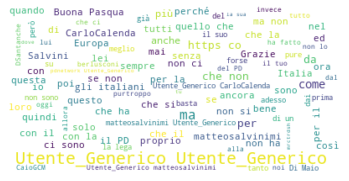

In [ ]:
full_text = " ".join(comm for comm in comments['text'])

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(full_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The word cloud we get is full of so-called stop words, the only significant words we can recognize are names of parties or politicians. A bit of text pre-processing is therefore mandatory.



## Text pre-processing

There are differnt types of text preprocessing steps which can be applied and the choice of these steps depends on the tasks to be performed.


For this initial step, our goal is to identify the most used words in the comments and the main topics of discussion.

### Removal of patterns

In [ ]:
import re
from collections import Counter

def remove_patterns(text, patterns):

    for pattern in patterns:
        r = re.findall(pattern, text)
        for i in r:
            text = re.sub(re.escape(i), '', text)   
    return text

def pattern_freq(docs, pattern):
    p_freq = Counter()
    for text in docs:
        p_found= re.findall(pattern, text)
        for p in p_found:
            p_freq[p] += 1
    return p_freq

In [ ]:
PATTERNS = {'urls': re.compile(r'https?://\S+|www\.\S+'),
            'users': re.compile(r'@[\w]*'),
            #'hashtags': re.compile(r'#[\w]*'),
            'digits': re.compile(r'(?<!\w)\d+|\d+(?!\w)'),
            'emojis': re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
}

Before removing patterns we can answer dollowing questions:
* Which are the most used hashtags?
* Which are most tagged users?
* Are there frequent URLs?
* Which are most frequent emojis/emoticons?

In [ ]:
hashtags_patt = re.compile(r'#[\w]*')

hashtags_freq = pattern_freq(comments['text'].values, hashtags_patt)       
hashtags_freq.most_common(10)

[('#facciamorete', 93),
 ('#Salvini', 89),
 ('#Europee2019', 64),
 ('#PD', 48),
 ('#Europa', 46),
 ('#ScriviMussolini', 45),
 ('#M5S', 42),
 ('#', 40),
 ('#SiamoEuropei', 40),
 ('#Lega', 37)]

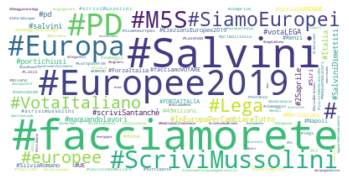

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(hashtags_freq)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
users_freq = pattern_freq(comments['text'].values, PATTERNS['users'])        
users_freq.most_common(10)

[('@Utente_Generico', 19119),
 ('@matteosalvinimi', 4321),
 ('@CarloCalenda', 3590),
 ('@GiorgiaMeloni', 1793),
 ('@Ale_Mussolini_', 1702),
 ('@DSantanche', 1349),
 ('@pdnetwork', 1299),
 ('@forza_italia', 1274),
 ('@CaioGCM', 1210),
 ('@civati', 1208)]

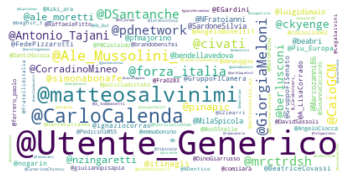

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(users_freq)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
urls_freq = pattern_freq(comments['text'].values, PATTERNS['urls'])        
urls_freq.most_common(10)

[('https://incursiomigrantum.blogspot.com/', 23),
 ('www.ilministerodellabellezza.com', 14),
 ('https://t.me/LauraFerrara', 14),
 ('https://www.cesenatoday.it/cronaca/feroce-zuffa-nella-chiesa-ortodossa-devastata-la-navata.html',
  6),
 ('https://www.facebook.com/1221875847970848/posts/1333601550131610/', 5),
 ('https://t.co/TGi4MyPhTv', 4),
 ('http://www.crpv.it/doc/89763/DLFE-2369.pdf', 4),
 ('http://www.treccani.it/export/sites/default/90anni/oggetti/img/1954_Pasta_Barilla.png',
  4),
 ('https://incursiomigrantum.blogspot.com', 4),
 ('https://www.open.online/fact-checking/2019/04/29/news/secondo_la_meloni_il_pd_vuole_coprire_con_delle_tendine_le_croci_e_i_simboli_religiosi_nei_cimiteri-202524/',
  4)]

In [ ]:
emojis_freq = pattern_freq(comments['text'].values, PATTERNS['emojis']) 
emojis_freq.most_common(10)

[('😂', 581),
 ('👍', 369),
 ('😂😂😂', 334),
 ('😉', 303),
 ('🇮🇹', 265),
 ('😊', 201),
 ('❤️', 181),
 ('😘', 176),
 ('❤', 170),
 ('😂😂', 155)]

### Removal of redundant spaces

In [ ]:
def remove_spaces(text):
    return ' '.join(text.split())

In [ ]:
text_clean = comments["text"].apply(lambda text: remove_patterns(text, PATTERNS.values()))
text_clean = text_clean.apply(lambda text: remove_spaces(text))
comments["text_clean"] = text_clean

In [ ]:
import random
for i in list(np.random.choice(list(comments.index), 5)):
    print(f'Comment {i}')
    print(comments.loc[i]['text'])
    print(comments.loc[i]['text_clean'], '\n')
    print()

Comment 41848
Edin Derviskadic il governo è 5 Stelle Lega. Non vedo distinzioni anzi... 

Edin Derviskadic il governo è Stelle Lega. Non vedo distinzioni anzi... 


Comment 47188
@Utente_Generico @CarloCalenda Ecco perché vincono le elezioni: sono votati da chi non sa di cosa si parli. 

Ecco perché vincono le elezioni: sono votati da chi non sa di cosa si parli. 


Comment 22715
Ripristini la leva obbligatoria 

Ripristini la leva obbligatoria 


Comment 7356
Vero a me nel nostro comune le hanno aumentate 

Vero a me nel nostro comune le hanno aumentate 


Comment 46292
okay campione 

okay campione 




### NLP with Spacy

In [ ]:
!python -m spacy download it_core_news_sm

import it_core_news_sm
nlp = it_core_news_sm.load()

In [ ]:
text_nlp = comments["text_clean"].apply(lambda text: nlp(text))
comments['text_nlp'] = text_nlp

In [ ]:
print(f"{'Token':<20}\t{'Lemma':<20}\t{'is-stop':<8}\t{'is-punct':<8}")
for token in comments['text_nlp'].iloc[0]:
    print(f"{token.text:<20}\t{token.lemma_:<20}\t{token.is_stop:^8}\t{token.is_punct:^8}")

Token               	Lemma               	is-stop 	is-punct
C'                  	C'                  	   0    	   0    
è                   	essere              	   0    	   0    
poco                	poco                	   1    	   0    
da                  	da                  	   1    	   0    
dire                	diro                	   1    	   0    
questa              	questo              	   1    	   0    
è                   	essere              	   0    	   0    
gente               	gente               	   0    	   0    
che                 	che                 	   1    	   0    
la                  	la                  	   1    	   0    
guerra              	guerra              	   0    	   0    
c'                  	c'                  	   0    	   0    
è                   	essere              	   0    	   0    
l                   	l                   	   0    	   0    
ha                  	avere               	   1    	   0    
portata             	portato            

## Removal of Stop-Words and Punctuation

In [ ]:
# Import list of stopwords from it_stop_words.py
import sys
sys.path.append(os.path.join(base_dir, "common_start/text_preprocessing"))
from it_stop_words import get_italian_stop_words
my_it_stop_words = get_italian_stop_words()

In [ ]:
from spacy.lang.it.stop_words import STOP_WORDS as it_spacy_stopwords

import nltk
nltk.download('stopwords')
it_nltk_stopwords = nltk.corpus.stopwords.words('italian')


it_stopwords = set(it_spacy_stopwords) | set(it_nltk_stopwords) | my_it_stop_words

for stopword in it_stopwords:
    nlp_vocab = nlp.vocab[stopword]
    nlp_vocab.is_stop = True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stop_punct(tokens):
    return(' '.join([token.text for token in tokens if not (token.is_stop or token.is_punct)]))

In [ ]:
text_wo_stop_punct = comments["text_nlp"].apply(lambda tokens: remove_stop_punct(tokens))
comments['text_clean'] = text_wo_stop_punct

## Further removal of punctuation

In [ ]:
import string
print(f"Punctuation symbols: {string.punctuation}")

Punctuation symbols: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def remove_punctuation(text):
    return(''.join([t for t in text if not t in string.punctuation]))

In [ ]:
text_wo_stop_punct = comments['text_clean'].apply(lambda text: remove_punctuation(text))
comments['text_clean'] = text_wo_stop_punct

In [ ]:
import random
for i in list(np.random.choice(list(comments.index), 5)):
    print(f'Comment {i}')
    print(comments.loc[i]['text'])
    print(comments.loc[i]['text_clean'])
    print()

Comment 9278
@matteosalvinimi @Utente_Generico Matteo non mollare con Siri
Matteo mollare Siri

Comment 68983
Mai piu con altri assieme.
assieme

Comment 48438
Lo scorso anno hanno preso di mira i templi buddhisti quest’anno è toccato alle chiese Cristiane la
Barbarie è solo islamica le altre religioni sono pacifiche e spirituali 
I mostri sono loro e l’Islam è un vero mostro da abbattere... 
ovviamente ci sono musulmani bravi che sono persone per bene e non sono loro il nemico 
Il nemico dell’umanità è l’Islam e basta una religione falsa e piena di odio dove quest’ultimo prevale su ogni cosa
preso mira templi buddhisti quest’ toccato chiese Cristiane Barbarie islamica religioni pacifiche spirituali I mostri l’ Islam mostro abbattere ovviamente musulmani bravi nemico nemico dell’ umanità l’ Islam religione falsa piena odio quest’ prevale

Comment 55060
Non ho parole.
E se fosse obbligatorio per le Forze dell'ordine lasciare l'arma in Caserma, quando si smonta dal servizio??
Ma soprattu

## Lower casing

In [ ]:
def lower_casing(text):
    return(text.lower())

In [ ]:
comments['text_clean'] = comments['text_clean'].apply(lambda text: lower_casing(text)).apply(lambda text: remove_spaces(text))

## Resulting word-cloud

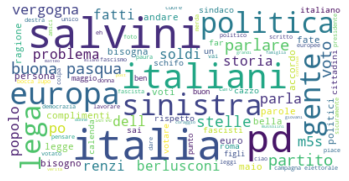

In [ ]:
full_cleaned_text = ' '.join([doc for doc in comments['text_clean']])

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(full_cleaned_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Text Cleaning from function

See text_preprocessing folder

In [19]:
# Import list of stopwords from it_stop_words.py
import sys
sys.path.append(os.path.join(base_dir, "Semantic_Group/text_preprocessing"))
from text_cleaning import *

cleaned_text = clean_content(comments['text'])

  0% (5 of 78174) |                      | Elapsed Time: 0:00:00 ETA:   0:27:42

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


100% (78174 of 78174) |##################| Elapsed Time: 0:23:06 Time:  0:23:06


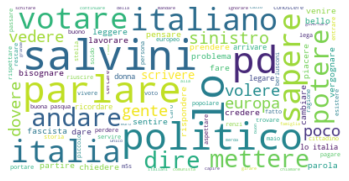

In [24]:
full_cleaned_text = ' '.join(cleaned_text)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(full_cleaned_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()